In [1]:

# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *

/usr/local/lib/python2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [2]:
def subtract_from_prev_val(df, col, init_val=0):
    return (df[col] - df.shift()[col])
    
def integrate_col(df, fxdx_col, dx_col, init_val):
    """
    Numeric integration from a panda data frame.
    Uses simply box method
    """
    fxdx_l = df[fxdx_col].tolist()
    dx_l = df[dx_col].tolist()
    prev_val = init_val
    y = [init_val]*len(df)
    for i in xrange(len(df)):
        y_val = prev_val + float(dx_l[i]) * fxdx_l[i]
        y[i] = y_val
        prev_val = y_val
    return np.array(y)

In [5]:
GYRO_COEF = 16.4# the scale factor represents the sensitivy factor applied to the sensor. 
                # divide by 131 to get degrees per second
GYRO_COEF = 131.0

In [6]:
df = pd.read_csv('data/stagnant_long_test_00.csv')
df_orig = df.copy()
# remove drift..
for gaxis in ['gx', 'gy', 'gz']:
    df[gaxis] = df[gaxis] / GYRO_COEF
df['time_diff'] = subtract_from_prev_val(df, 'timestamp').fillna(0)/1000
df['theta'] = integrate_col(df, 'gz', 'time_diff', 0)

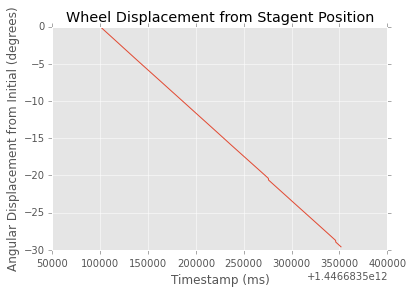

In [9]:

plt.plot(df['timestamp'], df['theta'])
plt.xlabel('Timestamp (ms)')
plt.ylabel('Angular Displacement from Initial (degrees)')
plt.title('Wheel Displacement from Stagent Position')
# plt.plot(df['gz'])

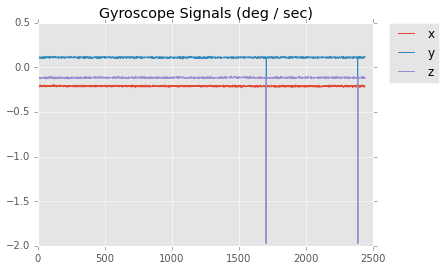

In [11]:
plt.plot(df['gx'], label='x')
plt.plot(df['gy'], label='y')
plt.plot(df['gz'], label='z')
plt.title('Gyroscope Signals (deg / sec)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [21]:
import datetime
print datetime.datetime.fromtimestamp(min(df.timestamp)/1000)
print datetime.datetime.fromtimestamp(max(df.timestamp)/1000)

2015-11-04 19:33:19.878063
2015-11-04 19:37:31.641704
